In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

34.814142752032836 -73.42871055883016
56.269586786735516 103.3137965598898
75.4712437137845 167.42548780670853
-56.642780271862414 91.46869687995371
76.3305190777771 -179.50855717778254
32.93462694843596 -163.5744969543788
23.384397928750246 130.49875517742618
-23.76659744226562 143.2014499938718
-53.220059259322724 23.416262337579013
-68.8083022806963 26.036618072136008
83.58446286319085 -114.39885147025774
39.98776447165443 156.0167348812575
-5.641794287646945 -46.20621330410353
32.08268556448766 43.756480306901864
-73.21511298742203 45.57962597543121
-15.707147400952223 40.479630388814314
-2.954620585320896 172.03585011460535
-28.50983473919502 148.49764239376333
-35.99714388535562 109.75790071890748
24.345047480353045 -87.476400416408
-47.10742643049275 179.9950703022232
-83.99593758577252 -93.05634627061227
-78.44483307870718 -80.51259755530519
-70.5098640789933 -69.36849330312089
76.35483709297188 9.70467111235942
-31.840099320035435 15.690262994805977
61.02702766345547 -129.2705

-36.73799477993579 102.78721457104837
-47.26689791110422 -106.73928605332537
1.2009078917135554 -152.8682874103856
73.70377011197758 126.1062840791177
58.59463667829377 37.733310070413694
-10.718325862435648 -11.132764309453904
54.78395019369941 -122.0250476145211
26.249400055008607 -65.43654971598843
-29.401571836277178 -55.23896222811099
85.4251043352061 1.8395099502383232
-57.878310043699145 172.90809817292836
87.26549783260779 -178.5537197207797
-82.54656670477388 -159.3148048288681
53.56737776416489 78.8422283021738
-36.77872328271012 -48.08086178338374
15.927746866739042 -171.79030647008372
-66.37215214135281 64.17601032341474
34.40393206573464 124.16300511217673
-84.83815052360673 -1.7582314988571568
10.42476543983939 21.067174502517844
35.730461434429074 -77.82114495752401
-65.19892297335733 129.65286665716638
60.557860871373634 92.8232027179111
-24.704708573019488 -52.80240297793182
-9.701986013366223 -38.90415582365324
-47.961531090245074 150.6557737202843
-9.37266574993646 2

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

653

In [7]:
# Import the requests library.
import requests

# Import the API key
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=10645d15a28a766dd86e36537e3427cb


In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1


# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(1)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | elizabeth city
Processing Record 2 of Set 1 | vidim
Processing Record 3 of Set 1 | pevek
Processing Record 4 of Set 1 | busselton
Processing Record 5 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 6 of Set 1 | kapaa
Processing Record 7 of Set 1 | nishihara
Processing Record 8 of Set 1 | mount isa
Processing Record 9 of Set 1 | bredasdorp
Processing Record 10 of Set 1 | yellowknife
Processing Record 11 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 12 of Set 1 | grajau
Processing Record 13 of Set 1 | baghdad
Processing Record 14 of Set 1 | port alfred
Processing Record 15 of Set 1 | mocambique
City not found. Skipping...
Processing Record 16 of Set 1 | utiroa
City not found. Skipping...
Processing Record 17 of Set 1 | moree
Processing Record 18 of Set 1 | panaba
Processing Record 19 of Set 1 | waipawa
Processing Record 20 of Set 1 | punta arenas
Process

Processing Record 40 of Set 4 | thinadhoo
Processing Record 41 of Set 4 | san patricio
Processing Record 42 of Set 4 | grand river south east
City not found. Skipping...
Processing Record 43 of Set 4 | lerwick
Processing Record 44 of Set 4 | kuche
City not found. Skipping...
Processing Record 45 of Set 4 | myitkyina
Processing Record 46 of Set 4 | xuddur
Processing Record 47 of Set 4 | bandundu
Processing Record 48 of Set 4 | tsihombe
City not found. Skipping...
Processing Record 49 of Set 4 | broome
Processing Record 50 of Set 4 | caravelas
Processing Record 1 of Set 5 | timmins
Processing Record 2 of Set 5 | lincoln
Processing Record 3 of Set 5 | srisailam
Processing Record 4 of Set 5 | kupang
Processing Record 5 of Set 5 | muros
Processing Record 6 of Set 5 | vostok
Processing Record 7 of Set 5 | la ronge
Processing Record 8 of Set 5 | tilichiki
Processing Record 9 of Set 5 | lianyuan
Processing Record 10 of Set 5 | daru
Processing Record 11 of Set 5 | chokurdakh
Processing Record 1

Processing Record 31 of Set 8 | cape canaveral
Processing Record 32 of Set 8 | bahir dar
Processing Record 33 of Set 8 | guicheng
City not found. Skipping...
Processing Record 34 of Set 8 | parrita
Processing Record 35 of Set 8 | novikovo
Processing Record 36 of Set 8 | leh
Processing Record 37 of Set 8 | road town
Processing Record 38 of Set 8 | vyartsilya
Processing Record 39 of Set 8 | karasuk
Processing Record 40 of Set 8 | murray bridge
Processing Record 41 of Set 8 | yerbogachen
Processing Record 42 of Set 8 | rio grande
Processing Record 43 of Set 8 | sao felix do xingu
Processing Record 44 of Set 8 | costinesti
Processing Record 45 of Set 8 | termoli
Processing Record 46 of Set 8 | kedrovyy
Processing Record 47 of Set 8 | camabatela
Processing Record 48 of Set 8 | bambous virieux
Processing Record 49 of Set 8 | formoso do araguaia
City not found. Skipping...
Processing Record 50 of Set 8 | portland
Processing Record 1 of Set 9 | achisay
City not found. Skipping...
Processing Re

Processing Record 15 of Set 12 | lata
Processing Record 16 of Set 12 | pirojpur
Processing Record 17 of Set 12 | husavik
Processing Record 18 of Set 12 | mollendo
Processing Record 19 of Set 12 | sorland
Processing Record 20 of Set 12 | catalao
Processing Record 21 of Set 12 | raudeberg
Processing Record 22 of Set 12 | rawson
Processing Record 23 of Set 12 | akyab
Processing Record 24 of Set 12 | scottsbluff
Processing Record 25 of Set 12 | kamenka
Processing Record 26 of Set 12 | a
City not found. Skipping...
Processing Record 27 of Set 12 | morondava
Processing Record 28 of Set 12 | nelson bay
Processing Record 29 of Set 12 | antibes
Processing Record 30 of Set 12 | del rio
Processing Record 31 of Set 12 | salinopolis
Processing Record 32 of Set 12 | maykain
City not found. Skipping...
Processing Record 33 of Set 12 | cairns
Processing Record 34 of Set 12 | merrill
Processing Record 35 of Set 12 | port augusta
Processing Record 36 of Set 12 | port shepstone
Processing Record 37 of Se

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Elizabeth City,36.2946,-76.2511,85.01,38,0,11.50,US,2022-06-28 17:34:55
1,Vidim,56.4088,103.1106,61.09,86,100,4.50,RU,2022-06-28 17:39:09
2,Pevek,69.7008,170.3133,44.38,93,100,14.12,RU,2022-06-28 17:39:09
3,Busselton,-33.6500,115.3333,48.18,83,2,9.93,AU,2022-06-28 17:39:10
4,Kapaa,22.0752,-159.3190,79.12,77,40,12.66,US,2022-06-28 17:39:10
5,Nishihara,26.1842,127.7558,81.68,89,20,10.36,JP,2022-06-28 17:39:11
6,Mount Isa,-20.7333,139.5000,58.77,33,90,6.91,AU,2022-06-28 17:39:12
7,Bredasdorp,-34.5322,20.0403,60.35,51,0,4.72,ZA,2022-06-28 17:39:12
8,Yellowknife,62.4560,-114.3525,68.56,28,20,13.80,CA,2022-06-28 17:34:45
9,Grajau,-5.8194,-46.1386,92.17,33,1,4.97,BR,2022-06-28 17:39:13


In [12]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Elizabeth City,US,2022-06-28 17:34:55,36.2946,-76.2511,85.01,38,0,11.50
1,Vidim,RU,2022-06-28 17:39:09,56.4088,103.1106,61.09,86,100,4.50
2,Pevek,RU,2022-06-28 17:39:09,69.7008,170.3133,44.38,93,100,14.12
3,Busselton,AU,2022-06-28 17:39:10,-33.6500,115.3333,48.18,83,2,9.93
4,Kapaa,US,2022-06-28 17:39:10,22.0752,-159.3190,79.12,77,40,12.66
...,...,...,...,...,...,...,...,...,...
594,Timbiqui,CO,2022-06-28 17:43:56,2.7717,-77.6654,81.43,74,69,5.88
595,Dalbandin,PK,2022-06-28 17:43:33,28.8947,64.4101,97.90,9,9,2.91
596,Abdanan,IR,2022-06-28 17:43:56,32.9926,47.4198,86.94,12,0,14.16
597,High Level,CA,2022-06-28 17:43:58,58.5169,-117.1360,68.11,56,20,5.75


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

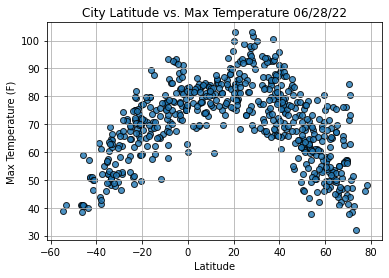

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

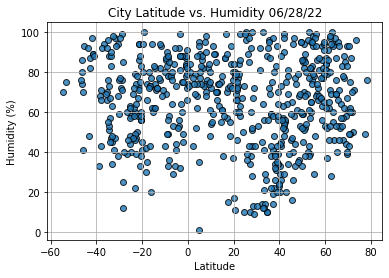

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

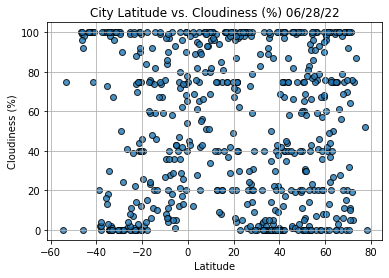

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

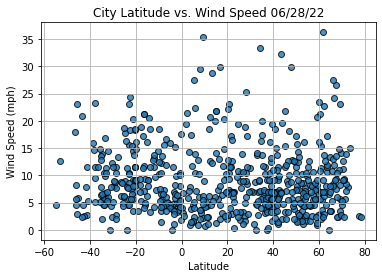

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [67]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [68]:
# Create a function to Check r_value of linregress.
def get_r(x_values, y_values):
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    return r_value

In [69]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
northern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Elizabeth City,US,2022-06-28 17:34:55,36.2946,-76.2511,85.01,38,0,11.50
1,Vidim,RU,2022-06-28 17:39:09,56.4088,103.1106,61.09,86,100,4.50
2,Pevek,RU,2022-06-28 17:39:09,69.7008,170.3133,44.38,93,100,14.12
4,Kapaa,US,2022-06-28 17:39:10,22.0752,-159.3190,79.12,77,40,12.66
5,Nishihara,JP,2022-06-28 17:39:11,26.1842,127.7558,81.68,89,20,10.36


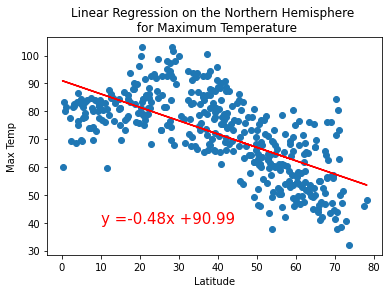

r = -0.664401860124178


In [70]:
# Linear regression on the Northern Hemisphere.
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))
print(f"r = {get_r(x_values, y_values)}")

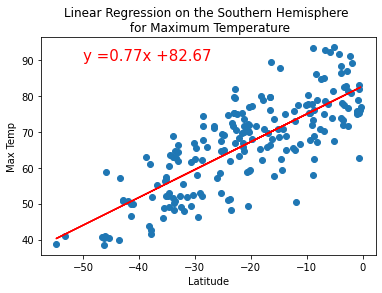

r = 0.7893153901739518


In [71]:
# Linear regression on the Northern Hemisphere.
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))
print(f"r = {get_r(x_values, y_values)}")

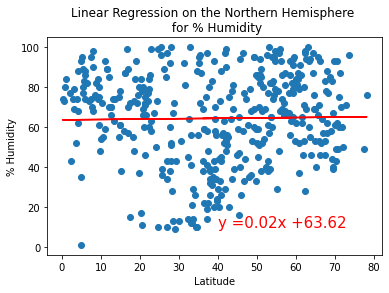

r = 0.017165152609149664


In [72]:
# Linear regression on the Northern Hemisphere.
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))
print(f"r = {get_r(x_values, y_values)}")

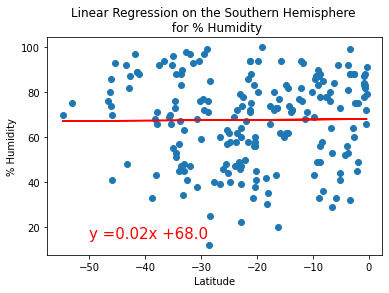

r = 0.010869800975020034


In [73]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))
print(f"r = {get_r(x_values, y_values)}")

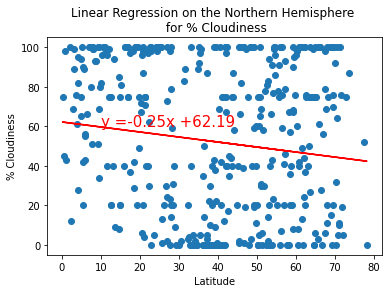

r = -0.13353653918968986


In [74]:
# Linear regression on the Northern Hemisphere.
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(10,60))
print(f"r = {get_r(x_values, y_values)}")

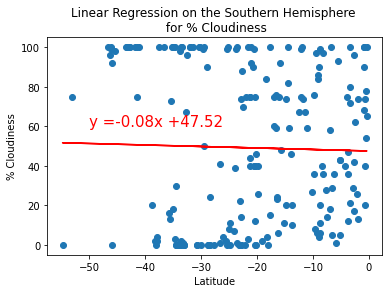

r = -0.025323901981920544


In [75]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))
print(f"r = {get_r(x_values, y_values)}")

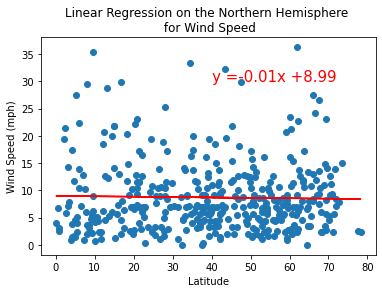

r = -0.02269835710392002


In [78]:
# Linear regression on the Northern Hemisphere.
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed (mph)',(40,30))
print(f"r = {get_r(x_values, y_values)}")

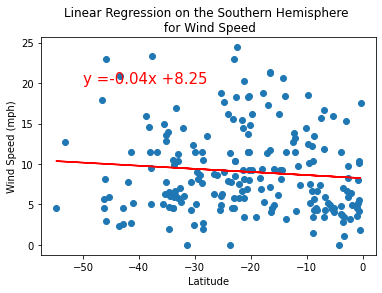

r = -0.09567446934650488


In [80]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed (mph)',(-50,20))
print(f"r = {get_r(x_values, y_values)}")